# **CODERHOUSE DS - 22745**
## Clase 9. Estadística Descriptiva

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics as stats
import math

# Objetivos
Al final de esta sesión habrás podido:

1. Conocer las generalidades de la Estadística Descriptiva.
2. Identificar los tipos de variables. 
3. Diferenciar las medidas de resumen.
4. Comprender la distribución: uniforme vs. normal.


La estadística descriptiva es una rama de la estadística que nos ayuda a entender mejor los datos, a partir de su descripción y análisis. Como parte del proceso de Data Science, la estadística descriptiva es uno de los pilares del Análisis Exploratorio de Datos o EDA, que veremos más adelante en este curso.

# Tipos de variables y tipos de datos

En estadística, **los tipos de variables son análogos en su concepto a los tipos de datos**. Los tipos de datos existen en programación, entre otras razones, porque **hay operaciones que podemos hacer con algunos de ellos pero con otros no**. Podemos partir de una noción básica en estadística sobre los tipos de variables a partir de esta analogía. En general hablaremos sobre una gran división en los tipos de variables, que es la que será más práctica para Data Science: variables cuantitativas y cualitativas.

## Variables cuantitativas

Las variables cuantitativas son variables para las que tiene sentido realizar la suma, la resta o el promedio, de acuerdo al caso. En general son numéricas y pertenecientes al conjunto de los números reales o a alguno de sus subconjuntos Por ejemplo, las alturas de las personas pueden estar medidas en centímetros, y las edades podrían estar medidas en números enteros, lo cual en realidad no sucede de esa forma (nuestra edad aumenta día a día, segundo a segundo) pero sí puede servir a fines prácticos.

Las variables numéricas pueden implementarse en Python con los tipos de datos int, float o complex.

**Ejemplos**

In [3]:
# Nombres
nombres = ['Amadeus','Balthazar','Sephirot','Sonya','Annabeth']

#Edades
edad = np.random.randint(low=18, high=35,size=len(nombres))

# Distancia en Metros
distancia = [21,33,78,101,46,16,32]

## Series de Tiempo

Las variables de tipo fecha constituyen un mundo aparte, tanto para la visión estadística como para el enfoque de tipos de datos de programación. Tienen algunas cualidades distintivas como la secuencialidad, la relación entre datos con valores sucesivos y las características particulares del devenir temporal, tales como años bisiestos, estaciones del año, periodicidad en escalas que no encajan de forma perfecta (como las semanas en el mes), etc.

En términos estadísticos, una serie de tiempo puede ser considerada como una variable cuantitativa, ya que si bien el promedio no es una operación que tenga mucho sentido, sí se pueden establecer diferencias entre fechas, que dan como resultado duraciones. Por ejemplo, es práctica común en el desarrollo de sistemas que la edad de una persona se calcule como la diferencia entre la fecha de nacimiento (cargada en la base de datos) y la fecha de hoy (calculada con una función del lenguaje de programación).


**Ejemplos**

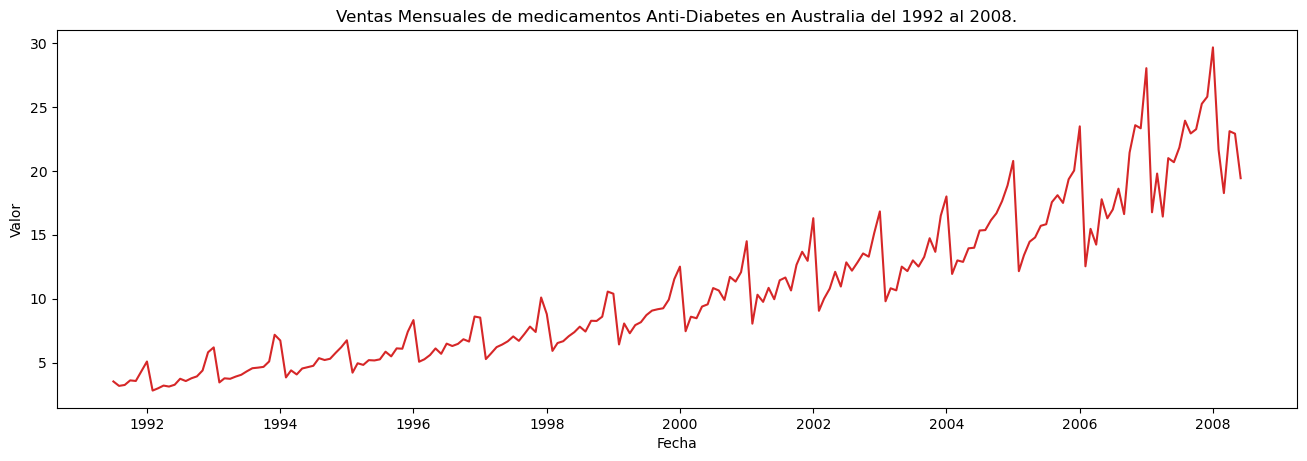

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Fecha', ylabel='Valor', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Ventas Mensuales de medicamentos Anti-Diabetes en Australia del 1992 al 2008.')    

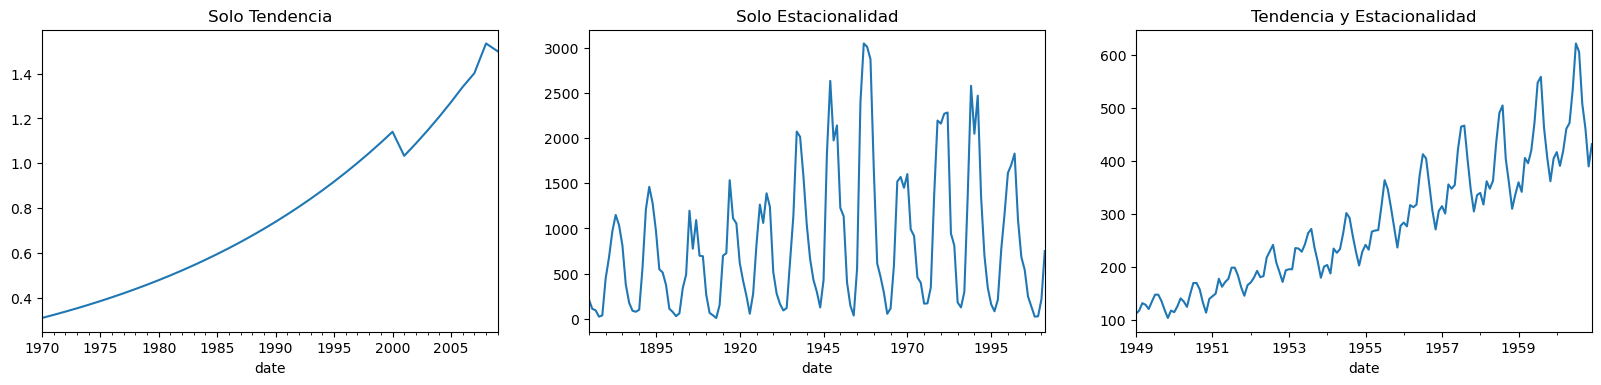

In [5]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Solo Tendencia', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Solo Estacionalidad', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Tendencia y Estacionalidad', legend=False, ax=axes[2])
plt.show()

## Variables Cualitativas Categóricas

Las variables categóricas o cualitativas, por su parte, como su nombre lo indica, **sirven efectivamente para categorizar elementos**. Esto significa que podríamos armar subconjuntos o subgrupos de elementos de acuerdo a dicha variable. Encontramos aquí por ejemplo algunos datos comunes que se utilizan en data science para caracterizar a las personas, tales como el sexo/género, la ocupación/profesión y el lugar de procedencia.


**Ejemplos**

In [ ]:
#Ocupaciones
profesion = ['ingeniería','medicina','bellas artes','gastronmía']

#Género
sexo = ['masculino','femenino','no binario','otro']

# Nacionalidad
nacionalidad = ['Colombiano','Argentino','Uruguayo','Brasileño']

* ### Variables Lógicas

Las variables lógicas son el análogo de los tipos de datos Booleanos o lógicos (bool) de Python. Este tipo de dato tiene como valores posibles verdadero (True) y falso (False). Esta variable tiene su tipo de dato específico en Python porque puede utilizarse para hacer operaciones particulares. No obstante, a los efectos del análisis estadístico, **sigue siendo una variable categórica**.

**Ejemplos**

In [ ]:
#Calificaciones
nota_final = [1,5,4,4,3,3.5,3,2.5,1,1.5,4.5,4,4.5,3]
nota_aprobacion = 3.5
Booleana = [valor > nota_aprobacion for valor in nota_final]
Booleana

## Conceptos Básicos

* Los datos que componen un conjunto a analizar describen una parte de la realidad o la situación de interés.<br>


*  **Observación:** conjunto de variables representadas con datos.
*  **Población:** universo de observaciones que consta de todas las unidades de observación posibles, incluidas aquellas a las que no tenemos acceso, o que todavía no ocurrieron.
*  **Muestra:** el conjunto de observaciones que contiene las unidades de observación a las que tenemos acceso.



## Medidas Resumen

### 1. Variables Cuantitativas

#### Medidas de tendencia central

* **Media o promedio:** 
El promedio o media aritmética se define como la suma de todos los valores dividida entre la cantidad de datos. $\frac{\sum_{i=1}^{n} x_i}{n}$

* **Mediana:** 
Centro de los datos después de ser ordenados de menor a mayor. En caso de que el set de datos sea par, se promedian los valores centrales.

* **Moda:** 
Se trata del valor que más veces se repite en el conjunto de datos.


**Ejemplos**



In [ ]:
#Mediana
student_ages = (9, 10, 9, 10, 9, 9, 10, 11, 11, 10, 9, 9)
print('La mediana de la edad de los estudiantes es:',stats.median(student_ages))

#Media
print('La media de la edad de los estudiantes es:', np.mean(student_ages))

#Moda
print("La moda del conjunto de datos es:",(stats.mode(student_ages)))

#### Medidas de dispersión

* **Varianza:** 
Consiste en medir las distancias de todos los datos hasta la media, elevar cada distancia al cuadrado, realizar la suma y dividir por la cantidad de datos menos dos unidades.

* **Desviación estándar:** 
La varianza tiene un problema: dado que su fórmula involucra una operación de elevar al cuadrado, su resultado estará expresado en unidades al cuadrado. Por ejemplo si estamos midiendo alturas en centímetros, la varianza estará dada en centímetros al cuadrado, lo cual no tiene mucho sentido si queremos interpretar el valor con respecto a los datos.


In [ ]:
student_ages = (9, 10, 9, 10, 9, 9, 10, 11, 11, 10, 9, 9)

#Desviación estandar y Varianza
np.std(student_ages)


### 2. Variables Cualitativas

Aquí se usan descriptivas como cantidad total, frecuencia de ocurrencia, cantidad de valores únicos, etc.

In [ ]:
dataframe=pd.DataFrame({'Attendance': {0: 60, 1: 100, 2: 80,3: 78,4: 95},
                        'Name': {0: 'Olivia', 1: 'John', 2: 'Laura',3: 'Ben',4: 'Kevin'},
                        'Obtained Marks': {0: 90, 1: 75, 2: 82, 3: 64, 4: 45}})



## Inferencia vs Visualización

Es muy común encontrar que quienes realizan análisis de datos se encuentren polarizados entre buscar explicar la myoría de elementos con gráficos y quienes desestiman la visualización por elementos descriptivos estadísticos como las medidas de tendencia central y de dispersión. En el siguiente link se encuentra una importante reflexión para ambos casos.

[DataSaurus Dozen / Cuarteto de Anscombe](https://www.autodesk.com/research/publications/same-stats-different-graphs)